In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
from scipy import stats
import seaborn as sns
from teeplot import teeplot as tp


In [2]:
from dishpylib.pyhelpers import make_outattr_metadata
from dishpylib.pyhelpers import print_runtime


In [3]:
print_runtime()


context: ci
hostname: 11d19e0899d6
interpreter: 3.8.12 (default, Sep 10 2021, 00:16:05)  [GCC 7.5.0]
notebook name: x=mutation_accumulation-robustness
notebook path: /opt/dishtiny/binder/bucket=prq49/a=all_stints_all_series_profiles+endeavor=16/x=mutation_accumulation-robustness.ipynb
revision: 905d3fc11
timestamp: 2021-09-16T02:16:32Z00:00

IPython==7.16.1
packaging==20.9


<ipython-input-3-4d790cf6450f>:1: DeprecatedWarning: print_runtime is deprecated. use nbmetalog package instead
  print_runtime()


# get data


In [4]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/series-profiles/stage=8+what=elaborated/',
)


In [5]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2270,2277,2284,2285,2286,2287,2289,2290,2291,2292,2298,2299,2300,2301,2302,2308,2309,2310) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


'-4b8e8f9e4d8ca984'

In [6]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')


In [7]:
dfm10 = df[ df['Stint'] % 10 == 0 ]


# how do robustness (fraction deleterious) and mutation accumulation relate?


<ipython-input-8-034e920fedb1>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+ext=.png


<AxesSubplot:xlabel='Fraction Mutations that are Deleterious', ylabel='Mutation Accumulation'>

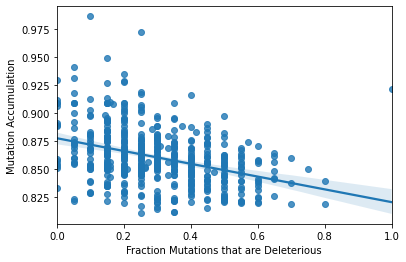

In [8]:
tp.tee(
    sns.regplot,
    data=df,
    x='Fraction Mutations that are Deleterious',
    y='Mutation Accumulation',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'identity',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-9-8dc1934e0a23>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+ext=.png


(0.09877733470496036, 0.544250018007815)

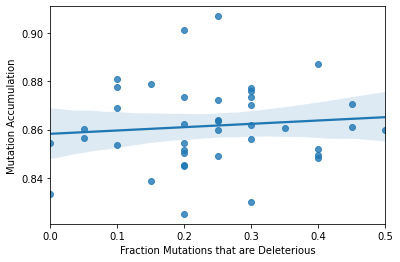

In [9]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Fraction Mutations that are Deleterious',
    y='Mutation Accumulation',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-40',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)

fil = df40.dropna(
    subset=[
        'Fraction Mutations that are Deleterious',
        'Mutation Accumulation',
    ],
)
stats.pearsonr(
    fil['Fraction Mutations that are Deleterious'],
    fil['Mutation Accumulation'],
)


<ipython-input-10-d58cff3bae45>:14: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+ext=.png


(-0.11369058002320477, 0.4848573914041796)

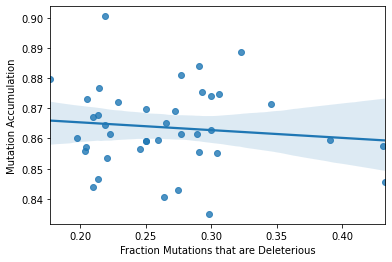

In [10]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fraction Mutations that are Deleterious',
    y='Mutation Accumulation',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'groupby-Series-mean',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)
stats.pearsonr(
    df.groupby('Series')['Fraction Mutations that are Deleterious'].mean(),
    df.groupby('Series')['Mutation Accumulation'].mean(),
)


# how do robustness (mean differential) and mutation accumulation relate?


<ipython-input-11-beba201b0805>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+ext=.png


<AxesSubplot:xlabel='Mean Mutant Fitness Differential', ylabel='Mutation Accumulation'>

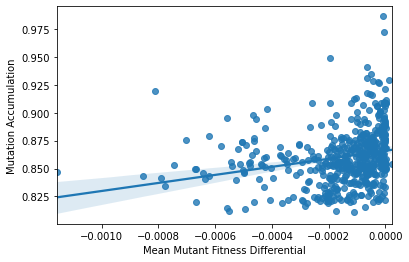

In [11]:
tp.tee(
    sns.regplot,
    data=df,
    x='Mean Mutant Fitness Differential',
    y='Mutation Accumulation',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'identity',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-12-c57316e17fdd>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+ext=.png


(-0.002206365109032709, 0.9892194806124409)

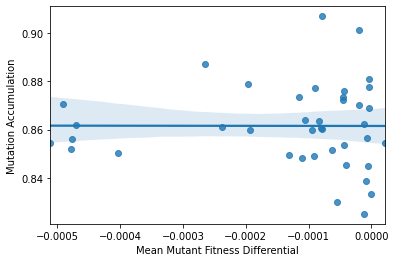

In [12]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Mean Mutant Fitness Differential',
    y='Mutation Accumulation',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-40',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)

fil = df40.dropna(
    subset=[
        'Mean Mutant Fitness Differential',
        'Mutation Accumulation',
    ],
)
stats.pearsonr(
    fil['Mean Mutant Fitness Differential'],
    fil['Mutation Accumulation'],
)


<ipython-input-13-800136ac7ffc>:14: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+ext=.png


(0.16693894448697355, 0.3032062729584956)

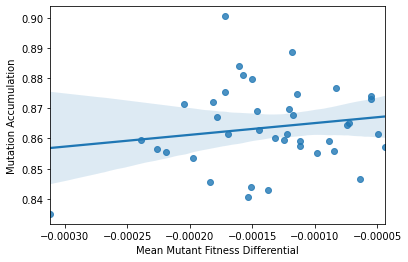

In [13]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Mean Mutant Fitness Differential',
    y='Mutation Accumulation',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'groupby-Series-mean',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)
stats.pearsonr(
    df.groupby('Series')['Mean Mutant Fitness Differential'].mean(),
    df.groupby('Series')['Mutation Accumulation'].mean(),
)


# how do robustness (mutaing mutant differential) and mutation accumulation relate?


<ipython-input-14-6b64bd526a36>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+ext=.png


<AxesSubplot:xlabel='Mean Mutating Mutant Fitness Differential', ylabel='Mutation Accumulation'>

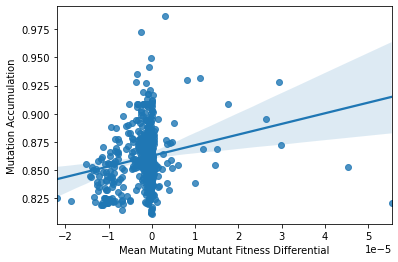

In [14]:
tp.tee(
    sns.regplot,
    data=df,
    x='Mean Mutating Mutant Fitness Differential',
    y='Mutation Accumulation',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'identity',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-15-e55e773a19d5>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+ext=.png


(-0.07445871906994476, 0.6479440218884447)

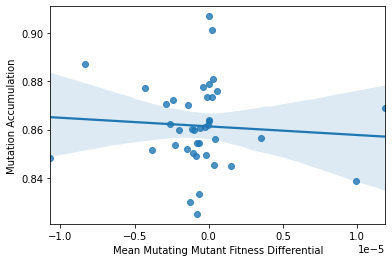

In [15]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Mean Mutating Mutant Fitness Differential',
    y='Mutation Accumulation',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-40',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)

fil = df40.dropna(
    subset=[
        'Mean Mutating Mutant Fitness Differential',
        'Mutation Accumulation',
    ],
)
stats.pearsonr(
    fil['Mean Mutating Mutant Fitness Differential'],
    fil['Mutation Accumulation'],
)


<ipython-input-16-0d2b41341be3>:14: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+ext=.png


(0.0873359899863658, 0.592047227049687)

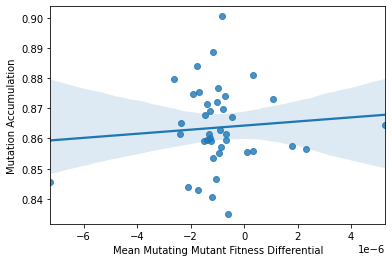

In [16]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Mean Mutating Mutant Fitness Differential',
    y='Mutation Accumulation',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'groupby-Series-mean',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)
stats.pearsonr(
    df.groupby('Series')['Mean Mutating Mutant Fitness Differential'].mean(),
    df.groupby('Series')['Mutation Accumulation'].mean(),
)


# how do robustness (frac deleterious mutaing mutant) and mutation accumulation relate?


<ipython-input-17-cf0e97e98816>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+ext=.png


<AxesSubplot:xlabel='Fraction Mutating Mutations that are Deleterious', ylabel='Mutation Accumulation'>

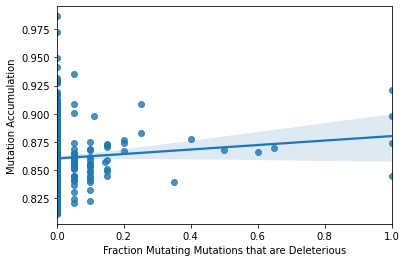

In [17]:
tp.tee(
    sns.regplot,
    data=df,
    x='Fraction Mutating Mutations that are Deleterious',
    y='Mutation Accumulation',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'identity',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-18-0b835fcc4676>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+ext=.png


(0.13579357785410964, 0.40344725384204494)

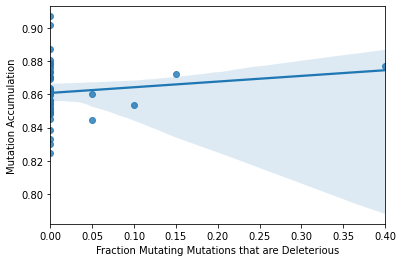

In [18]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Fraction Mutating Mutations that are Deleterious',
    y='Mutation Accumulation',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-40',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)

fil = df40.dropna(
    subset=[
        'Fraction Mutating Mutations that are Deleterious',
        'Mutation Accumulation',
    ],
)
stats.pearsonr(
    fil['Fraction Mutating Mutations that are Deleterious'],
    fil['Mutation Accumulation'],
)


<ipython-input-19-accd341a7c77>:14: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+ext=.png


(0.22368755673929785, 0.16528397011745283)

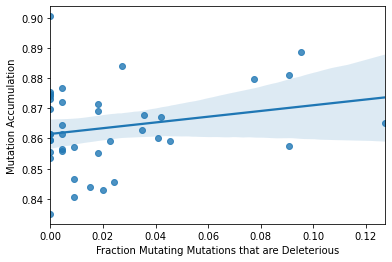

In [19]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fraction Mutating Mutations that are Deleterious',
    y='Mutation Accumulation',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'groupby-Series-mean',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)
stats.pearsonr(
    df.groupby('Series')['Fraction Mutating Mutations that are Deleterious'].mean(),
    df.groupby('Series')['Mutation Accumulation'].mean(),
)
